Bussiness Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Bike sharing/day.csv')

In [ ]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


Objective:


*   Understand the Dataset & cleanup (if required).
*   Build Regression models to predict the share of bikes.
*   Also evaluate the models & compare their respective scores like R2, RMSE, etc.




#Preprocessing the data

In [ ]:
df.describe(include = 'all').T #Why is not giving proper unique values?

# humiditiy = 0 does not make sense: we delete that.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,730.0,NaN,NaN,NaN,365.5,210.877136,1.0,183.25,365.5,547.75,730.0
dteday,730,730,01-01-2018,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,730.0,NaN,NaN,NaN,2.49863,1.110184,1.0,2.0,3.0,3.0,4.0
yr,730.0,NaN,NaN,NaN,0.5,0.500343,0.0,0.0,0.5,1.0,1.0
mnth,730.0,NaN,NaN,NaN,6.526027,3.450215,1.0,4.0,7.0,10.0,12.0
holiday,730.0,NaN,NaN,NaN,0.028767,0.167266,0.0,0.0,0.0,0.0,1.0
weekday,730.0,NaN,NaN,NaN,2.99726,2.006161,0.0,1.0,3.0,5.0,6.0
workingday,730.0,NaN,NaN,NaN,0.683562,0.465405,0.0,0.0,1.0,1.0,1.0
weathersit,730.0,NaN,NaN,NaN,1.394521,0.544807,1.0,1.0,1.0,2.0,3.0
temp,730.0,NaN,NaN,NaN,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347


In [ ]:
#we drop the columns instant and dtetype
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)
#df = df.drop(['dteday'], axis = 1)

##Checking for missing values:

In [ ]:
df.isnull().sum() # we have no null values yayy!

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

##Exploring the numerical varibles:

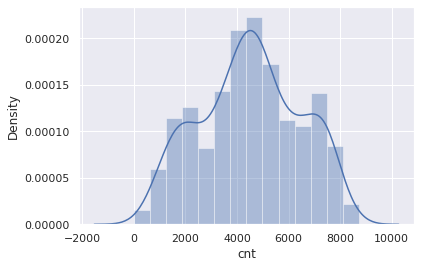

In [ ]:
#We check the pdf of count variable. This makes it easy to spot outliers. 

sns.distplot(df['cnt'])
plt.show() #maybe has outilers on left.

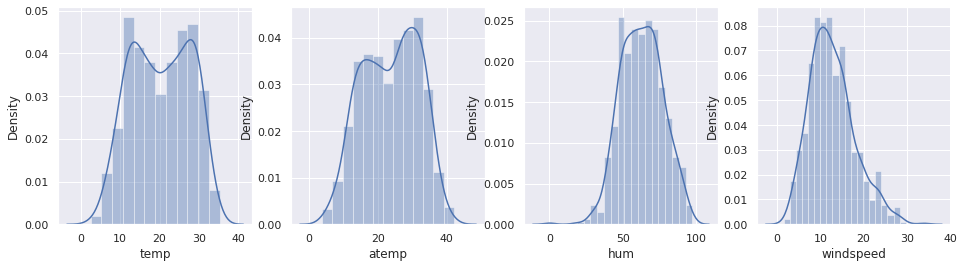

In [ ]:
f = plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.distplot(df['temp'])

plt.subplot(1,4,2)
sns.distplot(df['atemp'])

plt.subplot(1,4,3)
sns.distplot(df['hum'])

plt.subplot(1,4,4)
sns.distplot(df['windspeed'])

plt.show()

Here we can see that the variable temp has some outliers on the left and atemp has outliers on the right: But they are not lot so we can keep it as it is.

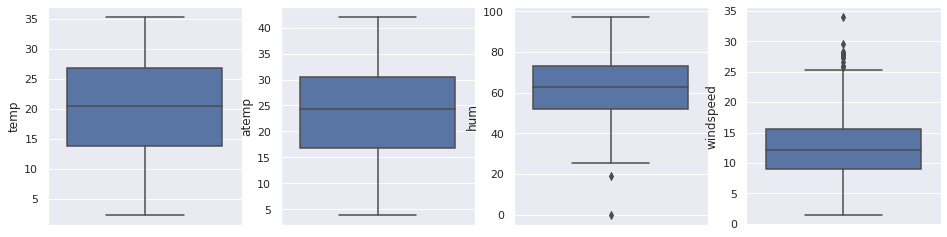

In [ ]:
#Boxplots
f = plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(y =df['temp'])

plt.subplot(1,4,2)
sns.boxplot(y=df['atemp'])

plt.subplot(1,4,3)
sns.boxplot(y =df['hum'])

plt.subplot(1,4,4)
sns.boxplot(y= df['windspeed'])

plt.show()

In [ ]:
#Deleting some outliers from windspeed

q = df['windspeed'].quantile(0.99)
df_1 = df[ df['windspeed']< q]

df_1 = df_1[df_1['hum'] != 0] # hum = 0 does not make sense so we delete that value

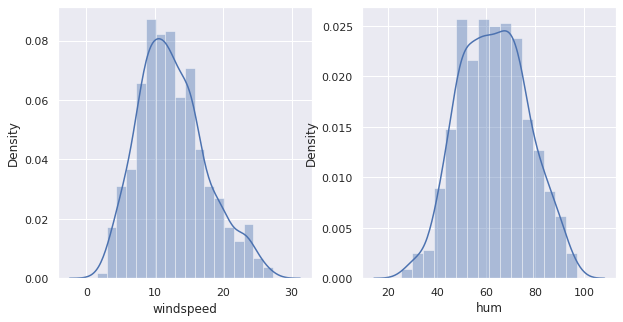

In [ ]:
f = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_1['windspeed'])

plt.subplot(1,2,2)
sns.distplot(df_1['hum'])

plt.show()

In [ ]:
df_1.shape, df.shape

((721, 12), (730, 12))

In [ ]:
df_cleaned = df_1.copy()

##Checking OLS assumptions scatter plots: Linearity

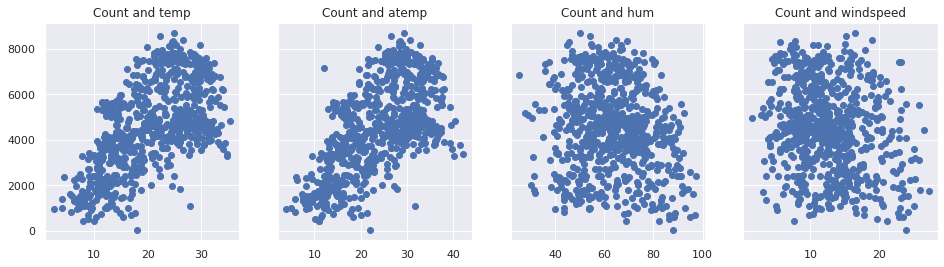

In [ ]:

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(16,4)) #sharey -> share 'Price' as y
ax1.scatter(df_cleaned['temp'],df_cleaned['cnt'])
ax1.set_title('Count and temp')

ax2.scatter(df_cleaned['atemp'],df_cleaned['cnt'])
ax2.set_title('Count and atemp')

ax3.scatter(df_cleaned['hum'],df_cleaned['cnt'])
ax3.set_title('Count and hum')

ax4.scatter(df_cleaned['windspeed'],df_cleaned['cnt'])
ax4.set_title('Count and windspeed')

plt.show()

Hum and windspeed show no specific relationship with Count.

##Categorical data

In [ ]:
list(df.columns)

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']

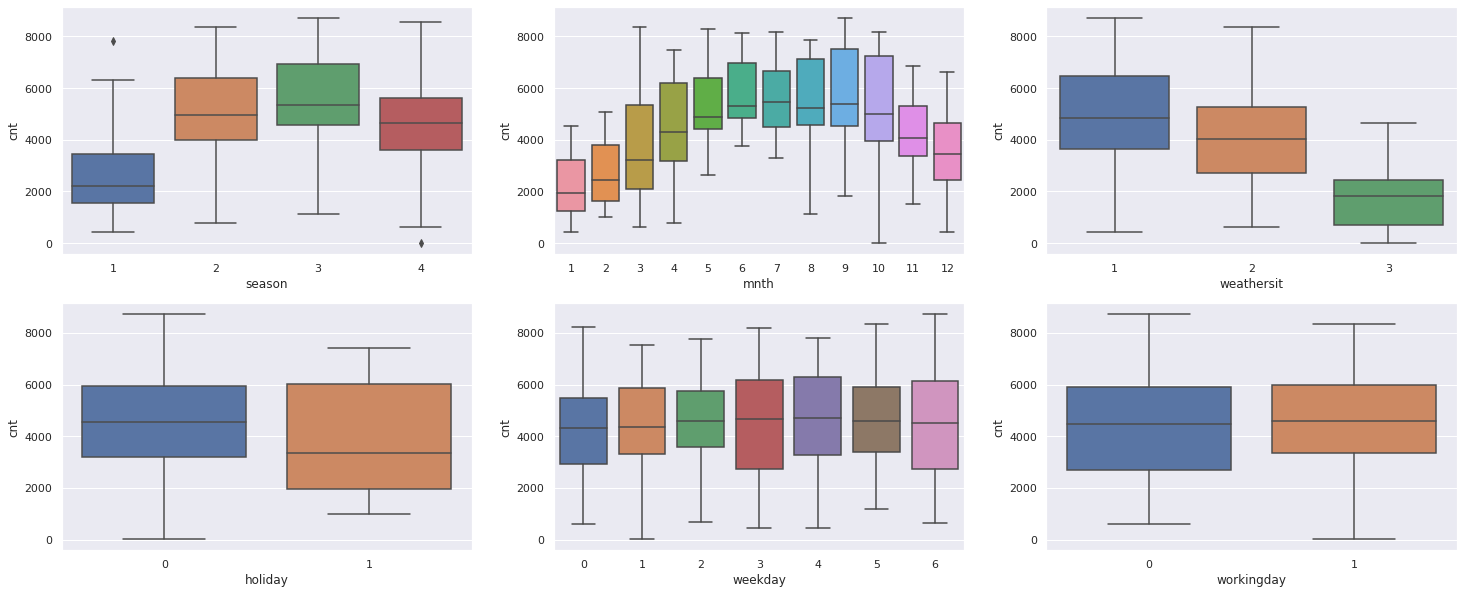

In [ ]:
#Visualization:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = df['season'], y = df['cnt'])
plt.subplot(2,3,2)
sns.boxplot(x = df['mnth'], y = df['cnt'])
plt.subplot(2,3,3)
sns.boxplot(x = df['weathersit'], y = df['cnt'])
plt.subplot(2,3,4)
sns.boxplot(x = df['holiday'], y = df['cnt'])
plt.subplot(2,3,5)
sns.boxplot(x = df['weekday'], y = df['cnt'])
plt.subplot(2,3,6)
sns.boxplot(x = df['workingday'], y = df['cnt'])
plt.show()

Interpretation:

In [ ]:
#all the categorical data columns:
cols = ['season','yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [ ]:
df_cleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
df_dummies = pd.get_dummies(df_cleaned, columns = cols, drop_first = True) #WHEN CATEGORICAL IS INTEGER, MAKE SURE TO MENTION THE COLUMNS

In [ ]:
df_dummies.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


##Multicollinearity

In [ ]:
#correlation matrix:
cm = df_dummies.corr()
cm
cm_cols = list(cm.columns)

In [ ]:
cm_mat = cm.to_numpy()

In [ ]:
high_corr = []

for i in range(0,cm_mat.shape[0]):
  for j in range(0,cm_mat.shape[1]):
    if (abs(cm_mat[i,j]) >0.7) and (cm_mat[i,j] != 1):
      high_corr.append((cm_cols[i], cm_cols[j], cm_mat[i,j]))

In [ ]:
high_corr

[('temp', 'atemp', 0.991723585683874), ('atemp', 'temp', 0.991723585683874)]

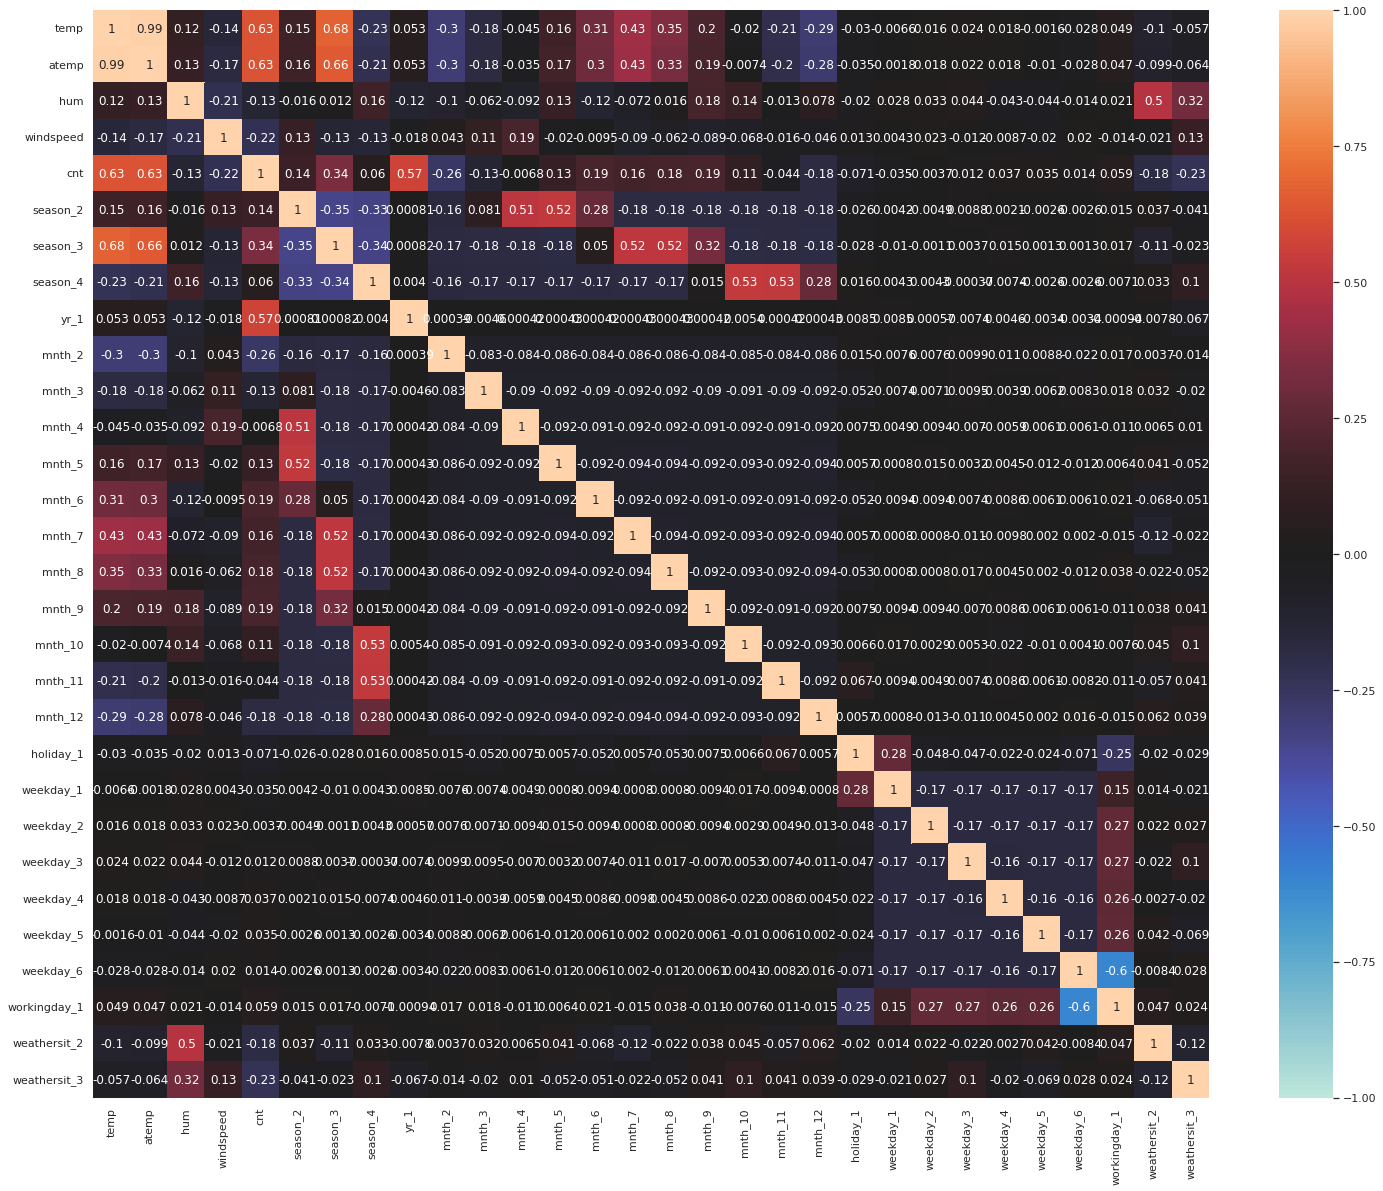

In [ ]:
#alternative: Heatmap
plt.figure(figsize=[25,20])
sns.heatmap(df_dummies.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

We can see that: (temp, atemp) are highly correlated. 

##Feature selection using VIF (Variance Inflation Factor).
Variance Inflation Factor (VIF) measures the degree of multicollinearity in a set of
independent variables.
Mathematically, it is equal to the ratio of the overall model variance to the variance
of a model that includes only that single independent variable.
The smallest possible value for VIF is 1 (i.e., a complete absence of collinearity). As
a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of
multicollinearity.

Collinearity can exist between three or more variables even if no
pair of variables is seen to have an exceptionally high correlation. Hence, VIF is a
better way to assess multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_dummies.drop('cnt', axis = 1)
#X = add_constant(df_dummies)

variables = X

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.index = variables.columns

In [ ]:
vif

,VIF
temp,661.867572
atemp,645.412702
hum,27.713734
windspeed,6.577677
season_2,10.232365
season_3,14.569778
season_4,9.824563
yr_1,2.028265
mnth_2,1.811819
mnth_3,2.769790


atemp and temp are highly correlated so we drop temp

In [ ]:
df_1 = df_dummies.copy()

In [ ]:
#We drop temp since it has a high VIF and high correlation with atemp but lower vif than atemp. They both have same corr with cnt
#We drop mnth_7 due its high vif, it also has low corr with cnt
#We drop weekday_3 due its high vif and lowest corr with cnt
df_1 = df_1.drop(['temp', 'mnth_7', 'weekday_3'], axis = 1)

In [ ]:
#Checking the VIFs again

X = df_1.drop('cnt', axis = 1)
#X = add_constant(df_dummies)

variables = X

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.index = variables.columns

In [ ]:
vif

,VIF
atemp,38.127963
hum,26.624105
windspeed,6.430679
season_2,8.664918
season_3,9.092578
season_4,8.867852
yr_1,2.009584
mnth_2,1.624353
mnth_3,1.905449
mnth_4,3.742103


In [ ]:
#We drop hum due its high vif and lower cor with cnt compared to temp: since we have considered atemp: hum is included in that
#We drop season_3 due it is high vif and low corr with cnt and high corr with atemp
#We drop workingday_1 due to its high vif and low corr with cnt
df_2 = df_1.drop(['hum','workingday_1', 'season_3'], axis = 1)

In [ ]:
#Checking the VIFs again

X = df_2.drop('cnt', axis = 1)
#X = add_constant(df_dummies)

variables = X

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.index = variables.columns

In [ ]:
vif

,VIF
atemp,8.458492
windspeed,6.036789
season_2,6.826104
season_4,6.943762
yr_1,1.987570
mnth_2,1.308780
mnth_3,1.713455
mnth_4,3.732690
mnth_5,3.876663
mnth_6,2.680875


In [ ]:
#We drop season_2 due to high vif and low corr with cnt
df_3 = df_2.drop(['season_2'], axis = 1)

In [ ]:
#Checking the VIFs again

X = df_3.drop('cnt', axis = 1)
#X = add_constant(df_dummies)

variables = X

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.index = variables.columns

In [ ]:
vif

,VIF
atemp,8.454397
windspeed,6.036398
season_4,6.943761
yr_1,1.987336
mnth_2,1.308776
mnth_3,1.409375
mnth_4,1.496840
mnth_5,1.557479
mnth_6,1.659611
mnth_8,1.707889


In [ ]:
#Dropping windspeed: high vif, lower corr with cnt compared to season and higher corr with atemp
df_4 = df_3.drop(['windspeed'], axis = 1)

In [ ]:
#Checking the VIFs again

X = df_4.drop('cnt', axis = 1)
#X = add_constant(df_dummies)

variables = X

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.index = variables.columns

In [ ]:
vif

,VIF
atemp,6.855898
season_4,6.891040
yr_1,1.974998
mnth_2,1.200720
mnth_3,1.288638
mnth_4,1.368955
mnth_5,1.545952
mnth_6,1.654509
mnth_8,1.707661
mnth_9,1.722019


TRY MAKING TWO MODELS: ONE WHERE WE DROP TEMP AND ONE WHERE WE DROP ATEMP

In [ ]:
data_preprocessed = df_4.copy()

#Model building

##Preparing the data

Declare inputs and targets

In [ ]:
targets = data_preprocessed['cnt']

inputs = data_preprocessed.drop(['cnt'],axis=1)

Scale the data: (try one without scaling)

In [ ]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

Train Test split

In [ ]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=24)

##MODEL using statsmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
x = add_constant(x_train)
results = sm.OLS(y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     126.4
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          1.45e-195
Time:                        16:48:43   Log-Likelihood:                -4671.8
No. Observations:                 576   AIC:                             9388.
Df Residuals:                     554   BIC:                             9483.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4539.1682     34.411    131.910      0.000    4471.576    4606.761
x1           993.5142     46.581     21.329      0.000     902.017    1085.011
x2           577.5832     79.305      7.283      0.000     421.809     733.358
x3          1017.7653     34.604     29.412      0.000     949.795    1085.736
x4           -23.7638     40.183     -0.591      0.555    -102.694      55.167
x5           110.5194     40.298      2.743      0.006      31.363     189.675
x6           209.3786     41.709      5.020      0.000     127.452     291.305
x7           255.3587     41.321      6.180      0.000     174.194     336.524
x8           205.0433     41.934      4.890      0.000     122.675     287.411
x9           199.4760     42.724      4.669      0.000     115.555     283.397
x10          292.1060     40.663      7.184      0.000     212.234     371.978
x11           50.5104     65.195      0.775      0.439     -77.550     178.571
x12          -68.5759     66.061     -1.038      0.300    -198.337      61.185
x13         -101.1010     54.895     -1.842      0.066    -208.928       6.727
x14         -117.0844     35.146     -3.331      0.001    -186.121     -48.048
x15           10.4729     41.433      0.253      0.801     -70.913      91.858
x16           26.4923     38.485      0.688      0.492     -49.102     102.086
x17           71.7536     40.015      1.793      0.073      -6.845     150.352
x18          105.2577     38.291      2.749      0.006      30.045     180.470
x19          108.0923     38.057      2.840      0.005      33.339     182.846
x20         -340.5344     35.159     -9.686      0.000    -409.596    -271.473
x21         -356.3499     33.308    -10.699      0.000    -421.775    -290.925
==============================================================================
Omnibus:                       55.995   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.040
Skew:                          -0.534   Prob(JB):                     9.54e-29
Kurtosis:                       5.058   Cond. No.                         5.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretations:
We can see that the variables 'weekday_1', 'mnth_2', 'mnth_11', 'weekday_2' have high p-values. So we remove them from our model.



In [ ]:
df_5 = data_preprocessed.drop(['weekday_1', 'mnth_2', 'mnth_11', 'weekday_2'], axis = 1)

In [ ]:
df_preprocessed = df_5.copy()

In [ ]:
#defining new inputs:
inputs = df_preprocessed.drop(['cnt'],axis=1)

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
#scaling
inputs_scaled = scaler.transform(inputs)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=24)

In [ ]:
x = add_constant(x_train)
results = sm.OLS(y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          1.53e-199
Time:                        16:50:31   Log-Likelihood:                -4672.7
No. Observations:                 576   AIC:                             9381.
Df Residuals:                     558   BIC:                             9460.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4539.0733     34.298    132.340      0.000    4471.703    4606.443
x1          1006.9264     43.859     22.958      0.000     920.778    1093.075
x2           518.0922     47.674     10.868      0.000     424.451     611.734
x3          1016.6942     34.518     29.454      0.000     948.892    1084.496
x4           123.6854     37.226      3.323      0.001      50.564     196.807
x5           221.1406     39.399      5.613      0.000     143.751     298.530
x6           265.2901     39.833      6.660      0.000     187.050     343.531
x7           212.6081     40.941      5.193      0.000     132.191     293.025
x8           207.4142     41.753      4.968      0.000     125.402     289.426
x9           309.6540     37.125      8.341      0.000     236.732     382.576
x10          101.3774     44.284      2.289      0.022      14.394     188.361
x11          -59.6181     39.830     -1.497      0.135    -137.853      18.616
x12         -120.0313     33.473     -3.586      0.000    -185.779     -54.283
x13           60.7686     36.927      1.646      0.100     -11.765     133.302
x14           96.0147     35.061      2.739      0.006      27.148     164.881
x15           99.7233     34.899      2.857      0.004      31.173     168.273
x16         -339.7063     35.074     -9.685      0.000    -408.600    -270.812
x17         -358.0882     33.132    -10.808      0.000    -423.166    -293.010
==============================================================================
Omnibus:                       54.870   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.178
Skew:                          -0.527   Prob(JB):                     6.58e-28
Kurtosis:                       5.026   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Model using sklearn

Create the regression

In [ ]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat = reg.predict(x_train)

In [ ]:
reg.score(x_train,y_train)

0.8267955997785907

In [ ]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,atemp,1006.926373
1,season_4,518.092160
2,yr_1,1016.694214
3,mnth_3,123.685435
4,mnth_4,221.140575
5,mnth_5,265.290140
6,mnth_6,212.608065
7,mnth_8,207.414209
8,mnth_9,309.654047
9,mnth_10,101.377367


#REGRESSION DIAGNOSTICS

##Normality and homoscedasticity

Text(0.5, 1.0, 'Residuals PDF')

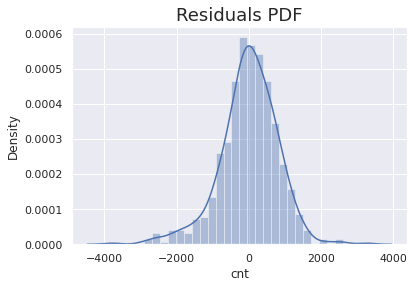

In [ ]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
residuals = y_train - y_hat
sns.distplot(residuals)

# Include a title
plt.title("Residuals PDF", size=18)


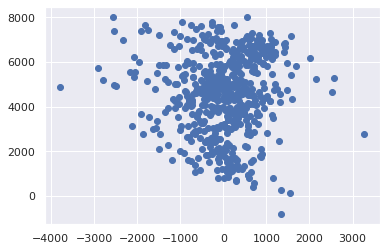

In [ ]:
#residual vs fitted plot: 
plt.scatter(residuals,y_hat)

plt.show()


If we get a 45 deg line then we are good

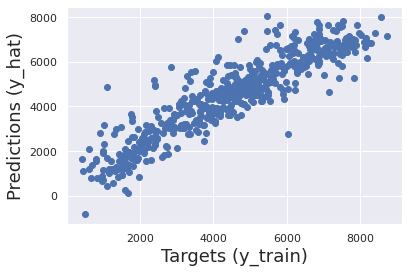

In [ ]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis nd the y-axis to be the same

plt.show()

#TESTING

In [ ]:
#r2_score(y_test, y_pred)
#one way to assess the model with a test set is by comparing in-model to out-of-model mean squared error (MSE).

In [ ]:
y_hat_test = reg.predict(x_test)

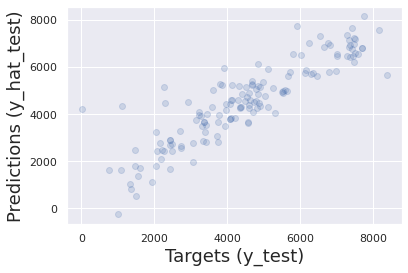

In [ ]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

plt.show()

In [ ]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,4837.459733
1,5146.996674
2,4605.431719
3,5730.206275
4,4278.919186


In [ ]:
y_test = y_test.reset_index(drop=True)

In [ ]:
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,4837.459733,4390
1,5146.996674,2277
2,4605.431719,4094
3,5730.206275,6359
4,4278.919186,4339
...,...,...
140,4876.866547,4585
141,4505.140964,4727
142,2406.913123,2252
143,5653.829907,8362


In [ ]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [ ]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,4837.459733,4390,-447.459733,10.192705
1,5146.996674,2277,-2869.996674,126.042893
2,4605.431719,4094,-511.431719,12.492226
3,5730.206275,6359,628.793725,9.888249
4,4278.919186,4339,60.080814,1.384670
...,...,...,...,...
140,4876.866547,4585,-291.866547,6.365683
141,4505.140964,4727,221.859036,4.693443
142,2406.913123,2252,-154.913123,6.878913
143,5653.829907,8362,2708.170093,32.386631


In [ ]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,145.000000,145.000000,145.000000,145.000000
mean,4540.392098,4486.731034,-53.661064,150.414656
std,1716.435169,1903.306663,877.483355,1585.261150
min,-251.295576,22.000000,-4202.940551,0.007278
25%,3529.392088,3214.000000,-471.373195,6.021782
50%,4534.733560,4486.000000,66.992915,11.190724
75%,5730.206275,5786.000000,532.024008,19.502408
max,8134.489709,8362.000000,2708.170093,19104.275233


In [ ]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
144,4843.65,4844,0.35,0.01
12,5758.05,5729,-29.05,0.51
39,7360.88,7286,-74.88,1.03
79,4586.21,4634,47.79,1.03
85,4534.73,4486,-48.73,1.09
114,5601.01,5668,66.99,1.18
4,4278.92,4339,60.08,1.38
71,6938.53,6825,-113.53,1.66
48,4281.13,4362,80.87,1.85
38,4242.08,4333,90.92,2.10


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat_test)

0.786650027572233